In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def power_law(wl, A, k, C):
    return A*(wl/(1+z))**k+C

def graph_more():
    plt.axvline(6563, label=r'H$\alpha$', color='red', linewidth=0.5)
    plt.axvline(4861, label=r'H$\beta$', color='cyan', linewidth=0.5)
    plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.legend(loc=1); plt.show()

z = 0.04573

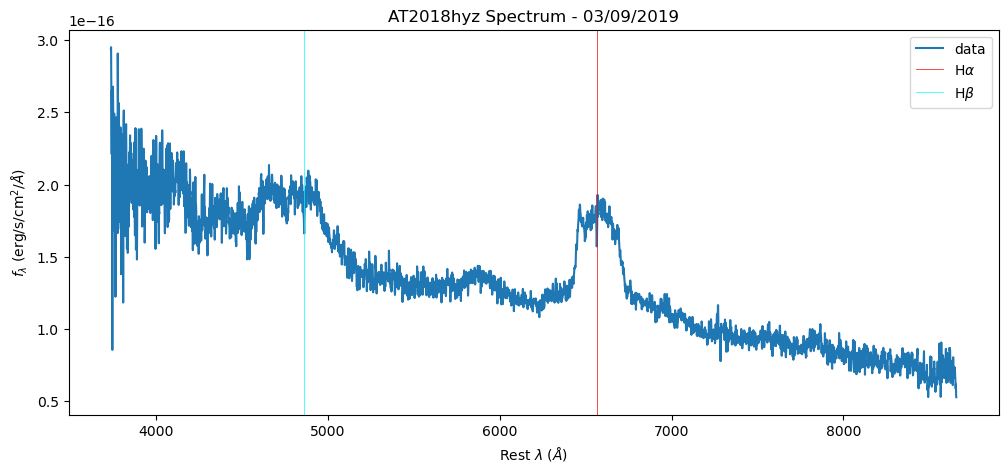

In [10]:
wl, flux = np.loadtxt('spec.txt', unpack=True)

continuum = curve_fit(power_law, wl, flux, maxfev=int(1e5))
pl_params = continuum[0]

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux, label='data')
#plt.plot(wl/(1+z), power_law(wl, *pl_params), label='fit')
#plt.xlim(5700, 6300)
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title('AT2018hyz Spectrum - 03/09/2019')
graph_more()

In [15]:
wl_1 = np.argmin(np.abs(wl/(1+z) - 5100))
wl_2 = np.argmin(np.abs(wl/(1+z) - 5750)); wl_3 = np.argmin(np.abs(wl/(1+z) - 6000))
wl_4 = np.argmin(np.abs(wl/(1+z) - 6400)); wl_5 = np.argmin(np.abs(wl/(1+z) - 6800))
cut_range = np.concatenate((np.arange(0, wl_1), np.arange(wl_2, wl_3), np.arange(wl_4, wl_5)))

wl_cut = np.delete(wl, cut_range); flux_cut = np.delete(flux, cut_range)

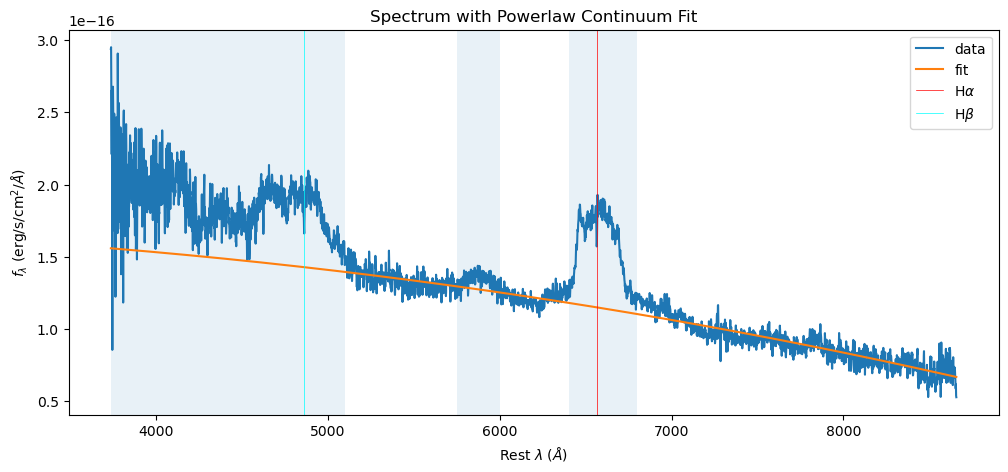

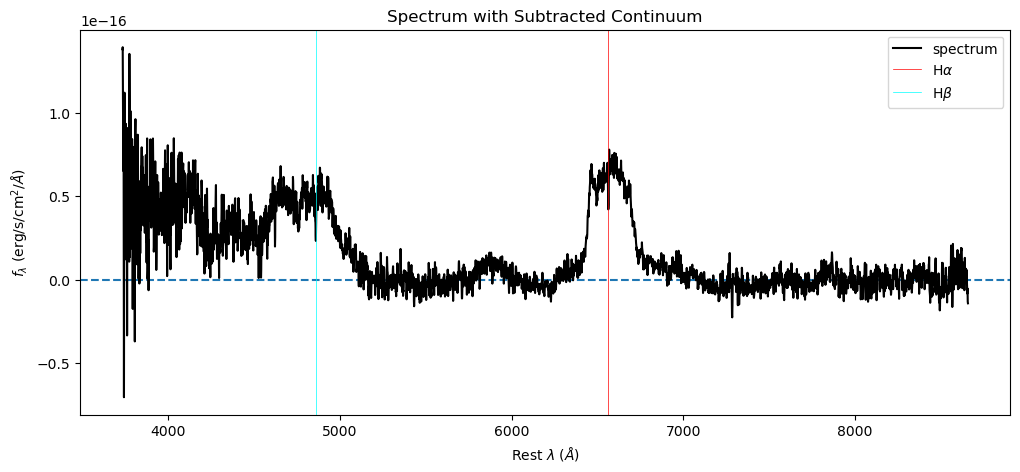

In [16]:
continuum = curve_fit(power_law, wl_cut, flux_cut, p0=pl_params, maxfev=int(1e5))

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux, label='data'); plt.plot(wl/(1+z), power_law(wl, *continuum[0]), label='fit')
plt.axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_4]/(1+z), wl[wl_5]/(1+z), alpha=0.1)
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)'); plt.title('Spectrum with Powerlaw Continuum Fit')
graph_more()

plt.figure(figsize=(12, 5))
plt.axhline(0, linestyle='--')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum[0]), color='black', label='spectrum')
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title('Spectrum with Subtracted Continuum')
graph_more()

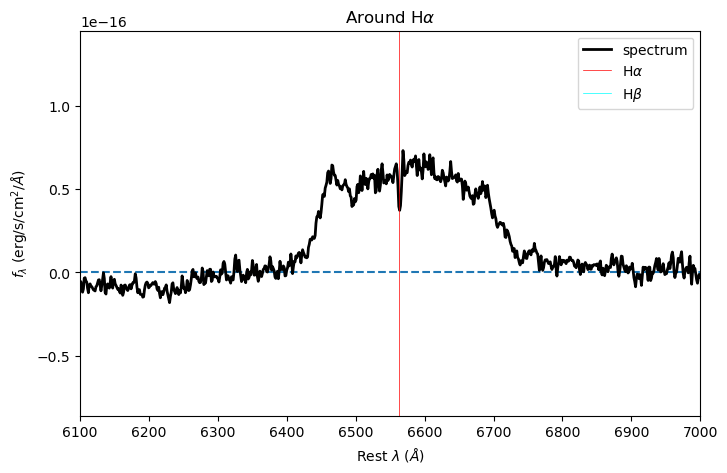

In [20]:
plt.figure(figsize=(8,5))
plt.axhline(0, linestyle='--')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum[0]) - 5e-18, color='black', linewidth=2, label='spectrum')
plt.xlim(6100, 7000)
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title(r'Around H$\alpha$')
graph_more()

In [21]:
continuum[0]

array([-2.38021710e-25,  2.19637816e+00,  1.72525087e-16])